In [1]:
%%time 
# ########   Here is a link for geopandas usage: https://colab.research.google.com/github/shakasom/GDS/blob/master/Part1%20-%20Introduction.ipynb#scrollTo=6pMKuuyNMnwv
# # Important library for many geopython libraries
# !apt install gdal-bin python-gdal python3-gdal 
# # Install rtree - Geopandas requirment
# !apt install python3-rtree 
# # Install Geopandas
# !pip install git+git://github.com/geopandas/geopandas.git
# # Install descartes - Geopandas requirment
# !pip install descartes 
# # Install Folium for Geographic data visualization
# !pip install folium
# # Install plotlyExpress
# !pip install plotly_express


import pandas as pd
import numpy as np
import cv2
import os 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
CPU times: user 689 ms, sys: 150 ms, total: 839 ms
Wall time: 16.8 s


In [40]:
data = os.path.join('/content/gdrive/My Drive/Time Series of Program Enrollments', 'time-series of CrossingNLP enrollments.csv')
df = pd.read_csv(data,header=0)
df.head(100)

,2013-10-16,1
0,2014-09-11,1
1,2015-01-30,72
2,2015-02-02,9
3,2015-02-03,1
4,2015-02-04,2
...,...,...
95,2015-10-05,3
96,2015-10-06,1
97,2015-10-07,3
98,2015-10-08,4


In [41]:
df.columns = ['Date', 'Count']
df = df.iloc[1:, :]

In [43]:
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Count    0
dtype: int64

In [44]:
df = df.groupby('Date').sum().reset_index()
#df =df.reset_index('Date')
df.head()

,Date,Count
0,2015-01-30,72
1,2015-02-02,9
2,2015-02-03,1
3,2015-02-04,2
4,2015-02-05,11


In [45]:
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
df.dtypes

Date     datetime64[ns]
Count             int64
dtype: object

In [49]:
df = df.set_index('Date', drop=True)

In [50]:
df.index

DatetimeIndex(['2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-10', '2015-02-11',
               '2015-02-19', '2015-02-20',
               ...
               '2021-05-14', '2021-05-20', '2021-05-27', '2021-06-03',
               '2021-06-04', '2021-06-10', '2021-06-17', '2021-07-01',
               '2021-07-06', '2021-07-08'],
              dtype='datetime64[ns]', name='Date', length=660, freq=None)

In [78]:
resampled_df = df['Count'].resample('2W').sum()

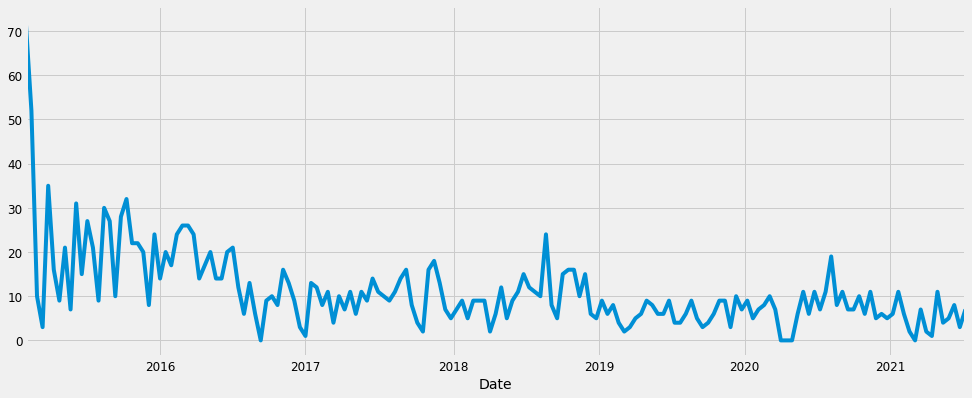

In [79]:
resampled_df.plot(figsize=(15,6))
plt.show()

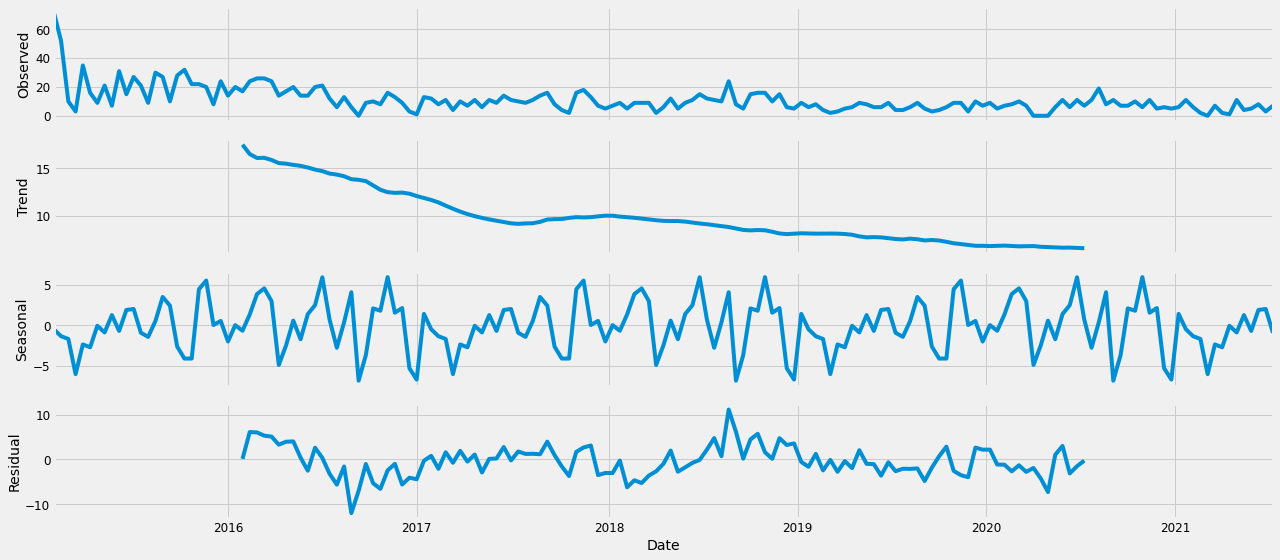

In [80]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(resampled_df, model='additive')
fig = decomposition.plot()
plt.show()

In [82]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 26),
 (0, 0, 1, 26),
 (0, 1, 0, 26),
 (0, 1, 1, 26),
 (1, 0, 0, 26),
 (1, 0, 1, 26),
 (1, 1, 0, 26),
 (1, 1, 1, 26)]

In [86]:
####### grid search for optimal parameters for ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(resampled_df, order = param, seasonal_order = param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}26 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            print('Somthing is wrong')

ARIMA(0, 0, 0)x(0, 0, 0, 26)26 - AIC:1345.2143052338072
ARIMA(0, 0, 0)x(0, 0, 1, 26)26 - AIC:1023.1854465955282
ARIMA(0, 0, 0)x(0, 1, 0, 26)26 - AIC:1006.9011979832394
ARIMA(0, 0, 0)x(0, 1, 1, 26)26 - AIC:761.6518004954363
ARIMA(0, 0, 0)x(1, 0, 0, 26)26 - AIC:945.6182782597709
ARIMA(0, 0, 0)x(1, 0, 1, 26)26 - AIC:910.7926724493107
ARIMA(0, 0, 0)x(1, 1, 0, 26)26 - AIC:771.2721518795411
ARIMA(0, 0, 0)x(1, 1, 1, 26)26 - AIC:757.4969265631494
ARIMA(0, 0, 1)x(0, 0, 0, 26)26 - AIC:1221.4031573329012
ARIMA(0, 0, 1)x(0, 0, 1, 26)26 - AIC:931.4266724068382
ARIMA(0, 0, 1)x(0, 1, 0, 26)26 - AIC:965.8684235509382
ARIMA(0, 0, 1)x(0, 1, 1, 26)26 - AIC:726.4290992696095
ARIMA(0, 0, 1)x(1, 0, 0, 26)26 - AIC:905.7277913456772
ARIMA(0, 0, 1)x(1, 0, 1, 26)26 - AIC:876.6952360181624
ARIMA(0, 0, 1)x(1, 1, 0, 26)26 - AIC:751.2148784159641
ARIMA(0, 0, 1)x(1, 1, 1, 26)26 - AIC:720.2754737856513
ARIMA(0, 1, 0)x(0, 0, 0, 26)26 - AIC:1159.0297441204632
ARIMA(0, 1, 0)x(0, 0, 1, 26)26 - AIC:855.3433420678775
ARIMA

In [87]:
# ARIMA(1, 0, 1)x(1, 1, 1, 26)26  is the best model!
mod = sm.tsa.statespace.SARIMAX(resampled_df, order=(1, 0, 1), seasonal_order=(1, 1, 1, 26), enforce_stationarity = False, enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9267      0.022     42.122      0.000       0.884       0.970
ma.L1         -0.7544      0.061    -12.293      0.000      -0.875      -0.634
ar.S.L26      -0.1620      0.067     -2.414      0.016      -0.294      -0.030
ma.S.L26      -0.7759      0.297     -2.612      0.009      -1.358      -0.194
sigma2        17.5820      4.336      4.055      0.000       9.083      26.081


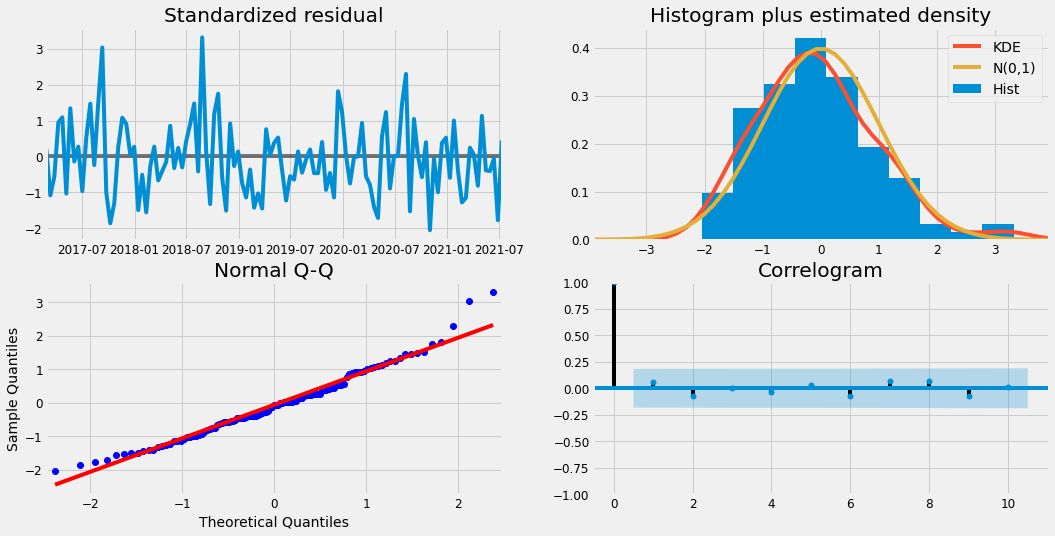

In [88]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

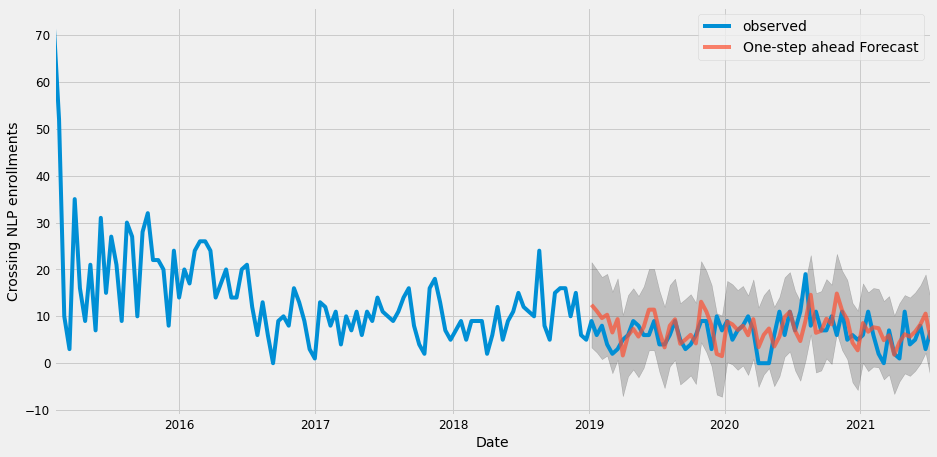

In [98]:
######### Validation of our ARIMA model
pred = results.get_prediction(start = pd.to_datetime('2019-01-13'), dynamic=False)
pred_ci = pred.conf_int()
ax = resampled_df['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crossing NLP enrollments')
plt.legend()
plt.show()

Producing and visualizing forecasts

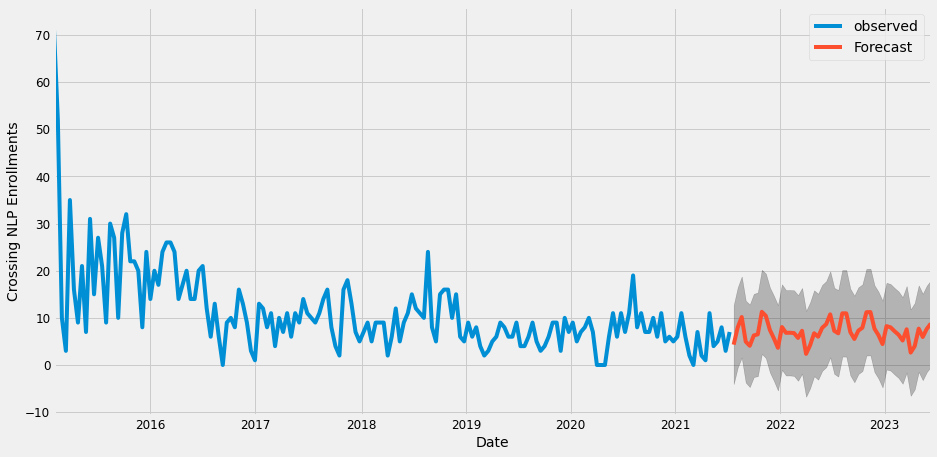

In [101]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = resampled_df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crossing NLP Enrollments')
plt.legend()
plt.show()

Our model clearly captured enrollment's seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.


In [11]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [14]:
df['Month'].max()

'2021-07'